<a href="https://colab.research.google.com/github/swastikbanerjee/NLP_Lab/blob/main/nlpLab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download("punkt")
import pandas as pd
import string
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, Embedding, SimpleRNN


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1. Find the similarity between two documents (2 corpus or two paragraphs) using any of the two similarity measures.**

---



In [ ]:
# Read the texts

text1 = "The Python programing language provides a wide range of tools and libraries for attacking specific NLP tasks. Many of these are found in the Natural Language Toolkit, or NLTK, an open source collection of libraries, programs, and education resources for building NLP programs."
text2 = "The NLTK includes libraries for many of the NLP tasks listed above, plus libraries for subtasks, such as sentence parsing, word segmentation, stemming and lemmatization (methods of trimming words down to their roots), and tokenization (for breaking phrases, sentences, paragraphs and passages into tokens that help the computer better understand the text)."

# Lower the texts
text1.lower()
text2.lower()

'the nltk includes libraries for many of the nlp tasks listed above, plus libraries for subtasks, such as sentence parsing, word segmentation, stemming and lemmatization (methods of trimming words down to their roots), and tokenization (for breaking phrases, sentences, paragraphs and passages into tokens that help the computer better understand the text).'

**Cosine Similarity**

In [ ]:
def text_similarity(text1, text2):
    tokens1 = word_tokenize(text1)
    tokens2 = word_tokenize(text2)
    lemmatizer = WordNetLemmatizer()
    tokens1 = [lemmatizer.lemmatize(token) for token in tokens1]
    tokens2 = [lemmatizer.lemmatize(token) for token in tokens2]
    stop_words = stopwords.words('english')
    tokens1 = [token for token in tokens1 if token not in stop_words]
    tokens2 = [token for token in tokens2 if token not in stop_words]
    vectorizer = TfidfVectorizer()
    vector1 = vectorizer.fit_transform(tokens1)
    vector2 = vectorizer.transform(tokens2)
    similarity = cosine_similarity(vector1, vector2)
    return similarity

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text1, text2])
similarity = cosine_similarity(vectors)
print(similarity)

[[1.         0.34441253]
 [0.34441253 1.        ]]


**Jaccard Similarity**

In [ ]:
wordtoken = word_tokenize(text1)
wordtokens = word_tokenize(text2)
set_a = set(wordtoken)
set_b = set(wordtokens)
def jaccard_distance(set1, set2):
	#Symmetric difference of two sets
	Symmetric_difference = set1.symmetric_difference(set2)
	# Unions of two sets
	union = set1.union(set2)

	return len(Symmetric_difference)/len(union)

distance = jaccard_distance(set_a, set_b)
print("Jaccard distance:", distance)

Jaccard distance: 0.8533333333333334


In [ ]:
data = pd.read_csv("/content/Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**EXPLORATORY DATA ANALYSIS**

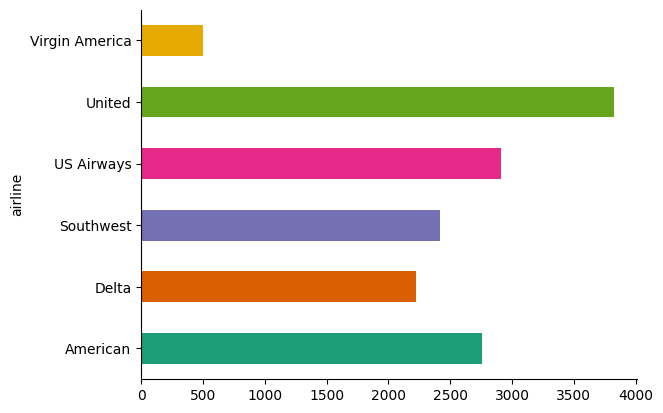

In [ ]:
data.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

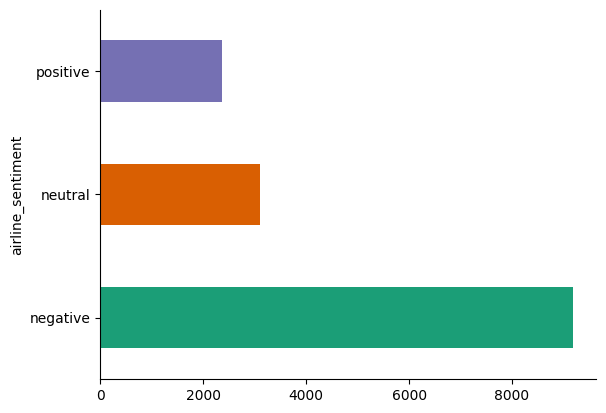

In [ ]:
data.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

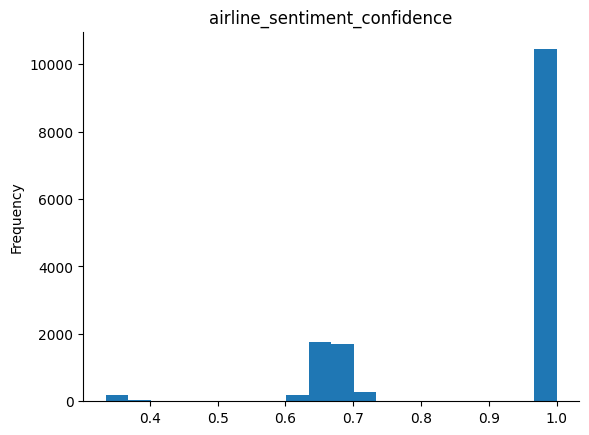

In [ ]:
data['airline_sentiment_confidence'].plot(kind='hist', bins=20, title='airline_sentiment_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tweet_df = data[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
tweet_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

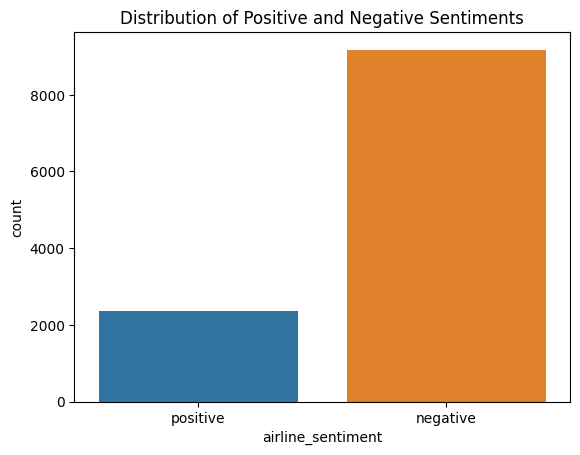

In [ ]:
sns.countplot(data=tweet_df,x='airline_sentiment',hue='airline_sentiment')
plt.title("Distribution of Positive and Negative Sentiments")
plt.show()

**2. Implement the Sentiment Analysis using Bayesian Classification.**

---



In [ ]:
tweet_df.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
# Label Encoding

lb = LabelEncoder()
tweet_df['airline_sentiment'] = lb.fit_transform(tweet_df['airline_sentiment'])

In [ ]:
st = stopwords.words('english')
st.append("and")

In [ ]:
# Cleaning the data

def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)
    return test_punc_st_removed

In [ ]:
tweet_df_clean = tweet_df['text'].apply(message_cleaning)

In [ ]:
data = tweet_df_clean.tolist()

In [ ]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()
tweets_countvectorizer.shape

(11541, 13843)

In [ ]:
X = tweets_countvectorizer
y = tweet_df['airline_sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = NB_classifier.predict(X_test)

<Axes: >

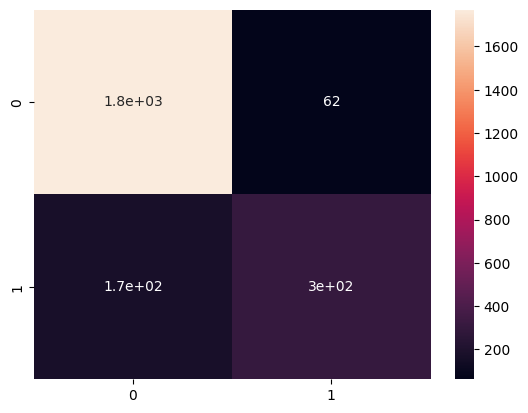

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot = True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

0.8982243395409268

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1832
           1       0.83      0.64      0.72       477

    accuracy                           0.90      2309
   macro avg       0.87      0.80      0.83      2309
weighted avg       0.89      0.90      0.89      2309



**Data Preparation**

In [ ]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)
print(tweet[0])
print(encoded_docs[0])

{'to': 1, 'the': 2, 'i': 3, 'a': 4, 'united': 5, 'you': 6, 'for': 7, 'flight': 8, 'and': 9, 'on': 10, 'my': 11, 'usairways': 12, 'americanair': 13, 'is': 14, 'in': 15, 'southwestair': 16, 'of': 17, 'jetblue': 18, 'me': 19, 'your': 20, 'it': 21, 'was': 22, 'not': 23, 'no': 24, 'have': 25, 'at': 26, 'with': 27, 'that': 28, 'this': 29, 'get': 30, 'but': 31, 'be': 32, 'cancelled': 33, 'thanks': 34, 'now': 35, 'service': 36, 'are': 37, 'we': 38, 'from': 39, 'an': 40, 'been': 41, 'just': 42, '2': 43, 'so': 44, 'customer': 45, 'help': 46, 't': 47, 'can': 48, 'time': 49, 'co': 50, 'up': 51, 'hours': 52, 'http': 53, 'do': 54, 'hold': 55, 'they': 56, 'out': 57, 'amp': 58, 'plane': 59, "i'm": 60, 'us': 61, 'all': 62, 'will': 63, 'why': 64, 'thank': 65, 'still': 66, 'our': 67, 'delayed': 68, 'what': 69, 'when': 70, 'how': 71, 'one': 72, "can't": 73, 'flights': 74, 'call': 75, 'gate': 76, 'hour': 77, 'had': 78, 'flightled': 79, 'back': 80, 'bag': 81, 'if': 82, 'would': 83, 'after': 84, 'has': 85, '

In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

**3. Implement the Sentiment Analysis using RNN.**

---



In [ ]:
embedding_vector_length = 32
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model1.add(SpatialDropout1D(0.25))
model1.add(SimpleRNN(50, dropout=0.5, recurrent_dropout=0.5))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 427689 (1.63 MB)
Trainable params: 427689 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history1 = model1.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
289/289 [==============================] - 85s 286ms/step - loss: 0.7094 - accuracy: 0.5532 - val_loss: 0.5836 - val_accuracy: 0.8540
Epoch 2/10
289/289 [==============================] - 76s 262ms/step - loss: 0.6153 - accuracy: 0.6924 - val_loss: 0.5688 - val_accuracy: 0.8545
Epoch 3/10
289/289 [==============================] - 74s 256ms/step - loss: 0.5711 - accuracy: 0.7603 - val_loss: 0.5015 - val_accuracy: 0.8545
Epoch 4/10
289/289 [==============================] - 75s 258ms/step - loss: 0.5480 - accuracy: 0.7789 - val_loss: 0.4259 - val_accuracy: 0.8545
Epoch 5/10
289/289 [==============================] - 74s 257ms/step - loss: 0.5327 - accuracy: 0.7801 - val_loss: 0.4300 - val_accuracy: 0.8545
Epoch 6/10
289/289 [==============================] - 81s 281ms/step - loss: 0.5262 - accuracy: 0.7808 - val_loss: 0.4160 - val_accuracy: 0.8545
Epoch 7/10
289/289 [==============================] - 85s 294ms/step - loss: 0.5201 - accuracy: 0.7805 - val_loss: 0.4448 - val_ac

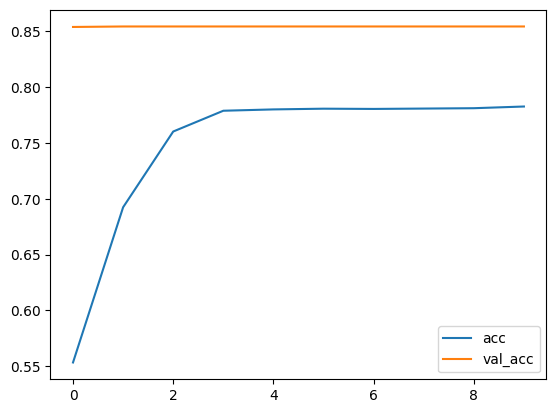

In [ ]:
plt.plot(history1.history['accuracy'], label='acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

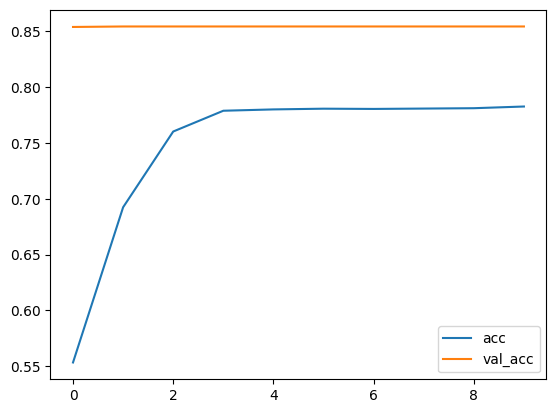

In [ ]:
plt.plot(history1.history['accuracy'], label='acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model1.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 245ms/step
Predicted label:  negative
1/1 [==============================] - 0s 52ms/step
Predicted label:  negative


**4. Implement the Sentiment Analysis using LSTM.**

---



In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
289/289 [==============================] - 245s 828ms/step - loss: 0.3931 - accuracy: 0.8351 - val_loss: 0.2085 - val_accuracy: 0.9186
Epoch 2/10
289/289 [==============================] - 253s 875ms/step - loss: 0.2196 - accuracy: 0.9153 - val_loss: 0.1757 - val_accuracy: 0.9350
Epoch 3/10
289/289 [==============================] - 266s 923ms/step - loss: 0.1640 - accuracy: 0.9383 - val_loss: 0.1747 - val_accuracy: 0.9307
Epoch 4/10
289/289 [==============================] - 239s 827ms/step - loss: 0.1322 - accuracy: 0.9516 - val_loss: 0.1765 - val_accuracy: 0.9342
Epoch 5/10
289/289 [==============================] - 235s 814ms/step - loss: 0.1114 - accuracy: 0.9587 - val_loss: 0.1863 - val_accuracy: 0.9320
Epoch 6/10
289/289 [==============================] - 206s 714ms/step - loss: 0.0995 - accuracy: 0.9639 - val_loss: 0.1790 - val_accuracy: 0.9381
Epoch 7/10
289/289 [==============================] - 191s 659ms/step - loss: 0.0874 - accuracy: 0.9669 - val_loss: 0.1861 -

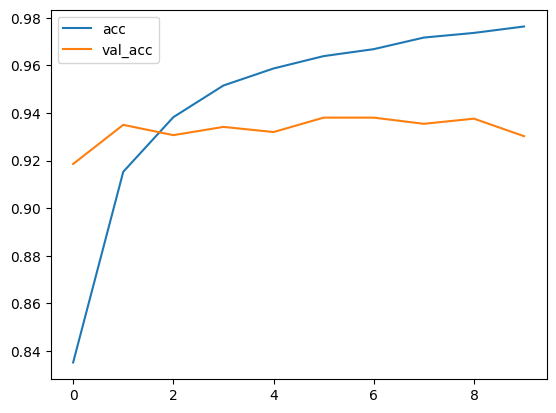

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

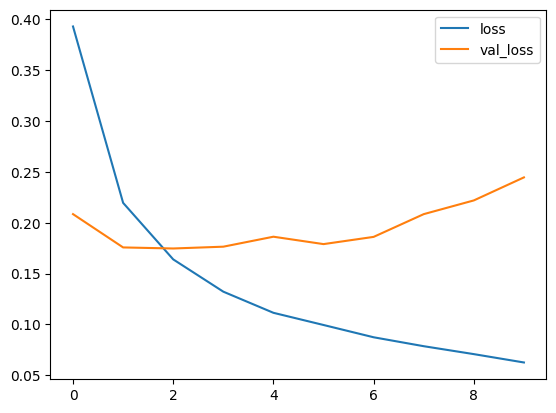

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 272ms/step
Predicted label:  positive
1/1 [==============================] - 0s 65ms/step
Predicted label:  negative


**Comparison Between Naive Bayes, RNN and LSTM**

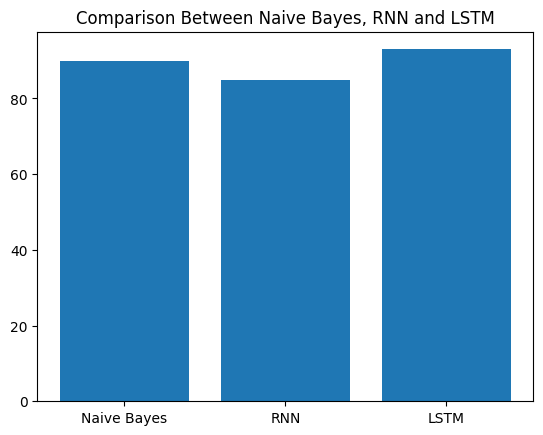

In [ ]:
accuracies = {u'Naive Bayes':89.8, u'RNN': 85, u'LSTM':93}
plt.bar(*zip(*accuracies.items()))
plt.title("Comparison Between Naive Bayes, RNN and LSTM")
plt.show()